In [4]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
import math

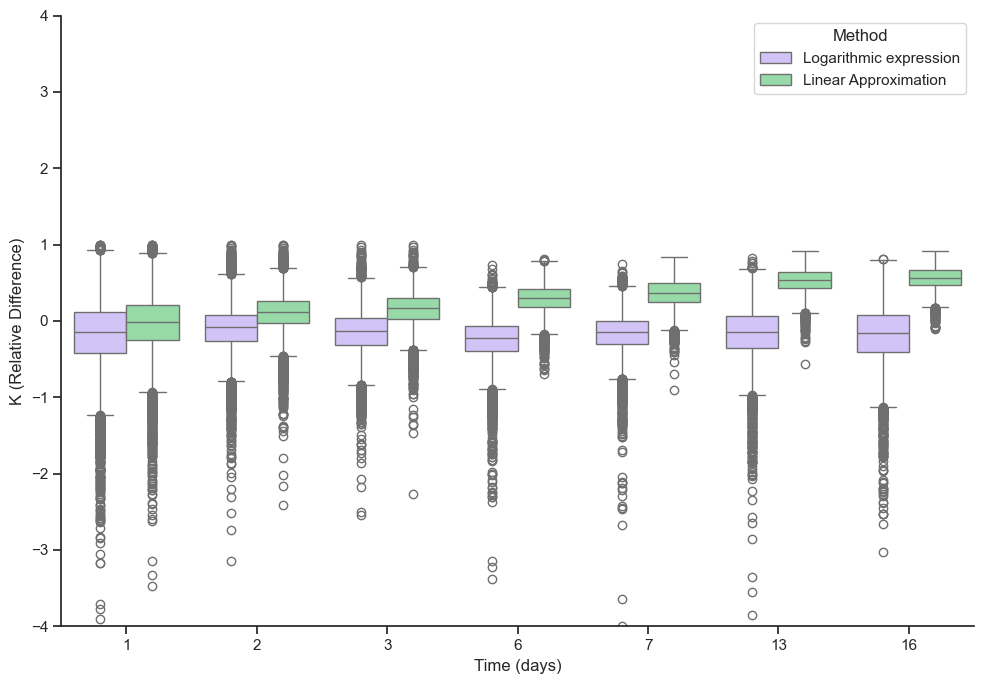

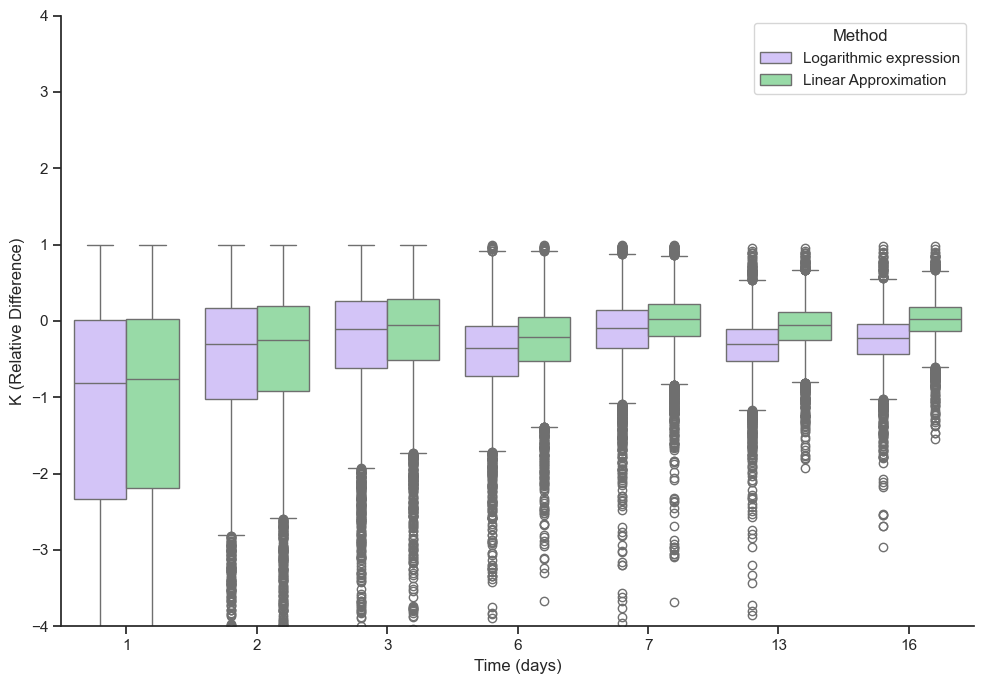

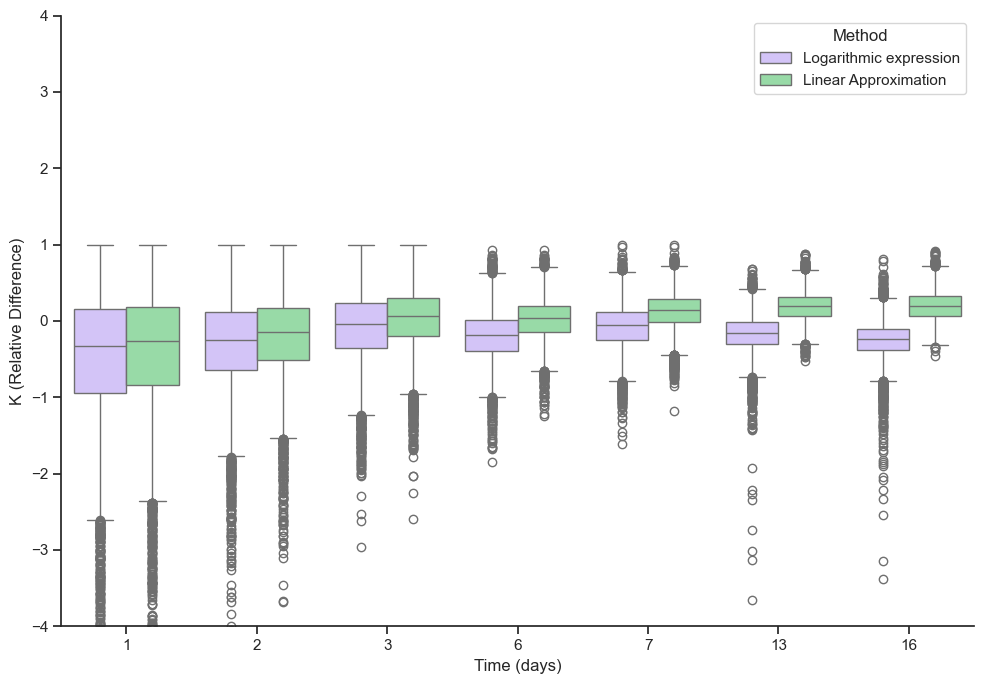

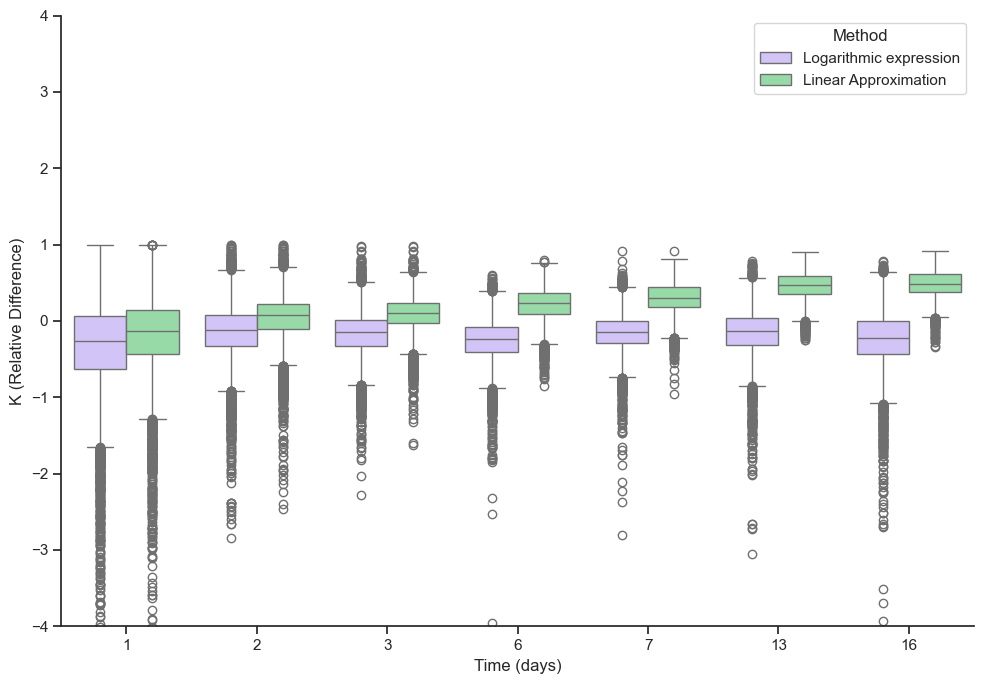

In [7]:

sns.set_theme(style="ticks", palette="pastel")

for organ in ['liver','muscle','heart','kidney']:
    time=[1 ,2 ,3 ,6 ,7,13,16]
    alldata=pd.DataFrame()
    for t in time:
        temp_data=pd.read_csv(rf"H:\workplace2\AlaysisForPaperAll\TimePointSelection\thirdPlot\Figures\{organ}\Day_{t}\r2_0.9\{organ}_day_{t}_fsr.csv")
        temp_data['time']=t
        alldata=pd.concat([alldata,temp_data])
    
    plotdata=pd.DataFrame()
    for src in ['Logarithmic expression','Linear Approximation']:#,'numberofterms_10']:
        if src=='Logarithmic expression':
            alldata['rd']=((alldata.d2ome_k - alldata.k_sol)/alldata.d2ome_k)            
        if src=='Linear Approximation':
            alldata['rd']=((alldata.d2ome_k - alldata.new_k_1)/alldata.d2ome_k)
        # if src=='numberofterms_10':
        #     alldata['rd']=((alldata.d2ome_k - alldata.new_k_10)/alldata.d2ome_k)
            
        alldata['Method']=src
        plotdata=pd.concat([plotdata,alldata[['rd','Method','time']]])

    plt.figure(figsize=(10,7))        
    sns.boxplot(x="time", y="rd",
            hue="Method", palette=["m", "g"],
            data=plotdata)
    plt.ylim([-4,4])
    plt.tight_layout()
    
    plt.ylabel("K (Relative Difference)")
    plt.xlabel("Time (days)")
    
    # Get the current axes object
    ax = plt.gca()

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.savefig(f"Figures_BoxPlots/{organ}_0.9_r2_plot_all.jpeg",dpi=900)
    plt.show()
    
                
        